In [26]:
import pandas as pd
import seaborn as snb
%matplotlib inline
import matplotlib.pyplot as plt
import pandas_profiling 
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve,auc



## Avoid some version change warnings
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [175]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': model.coef_,
                                'abs_coef': np.abs(model.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)
def my_linear_fitting(df,model,features_col,target_col):
    X=pd.dataframe(df[features_col])
    model.fit(X,y)
    model.score(X,y)
    view_coeff(X, model)

def my_logistic_regression(df,model,features_col,target_col,info=True,fit_info=False,acc_info=False,conf_matrix=False,c_m=False,roc=False):
    if(info):
        fit_info=True
        acc_info=True
        c_m=True
        roc=True
        
    
    features=pd.DataFrame(df[features_col])
    target=df[target_col]
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)
    model.fit(X_train,y_train)
    if(fit_info):
        for col in zip(X_train.columns, model.coef_[0]):
            print('{:<10s}  {:+.06f}'.format(col[0], col[1]))
    y_pred_test_prob=model.predict_proba(X_test)[:,1]
    y_pred_train_prob=model.predict_proba(X_train)              
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)              
    fit_results=pd.DataFrame()
    li=[features_col];
    fit_results['Features']=li
    fit_results['#Features']=len(features_col)
    #fit_results['coeff']=model.coef_[0]
    #fit_results['intercept']=model.intercept_
    
    fit_results['test_accurancy']=accuracy_score(y_test, y_pred_test)
    fit_results['train_accurancy']=accuracy_score(y_train, y_pred_train)
    confusion_train=confusion_matrix(y_train, y_pred_train)
    fit_results['Train TP'] = confusion_train[1, 1]
    fit_results['Train TN'] = confusion_train[0, 0]
    fit_results['Train FP'] = confusion_train[0, 1]
    fit_results['Train FN'] = confusion_train[1, 0]
    confusion_test=confusion_matrix(y_train, y_pred_train)
    fit_results['Test TP'] = confusion_test[1, 1]
    fit_results['Test TN'] = confusion_test[0, 0]
    fit_results['Test FP'] = confusion_test[0, 1]
    fit_results['Test FN'] = confusion_test[1, 0]
    fpr, tpr, _ = roc_curve(y_test, y_pred_test_prob)
        
        # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
    fit_results['AUC']= auc(fpr, tpr)
   
    
    if(acc_info):
        print('Accuracy Score for Test data:%.2f'%accuracy_score(y_test, y_pred_test))
        print('Accuracy Score for Train data:%.2f'%accuracy_score(y_train, y_pred_train))
    if(c_m):
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
        print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
    if(roc):
        fpr, tpr, _ = roc_curve(y_test, y_pred_test_prob)
        
        # Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
        roc_auc = auc(fpr, tpr)

        # Plot the ROC Curve
        plt.figure()
        lw = 2
        plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc = "lower right")
        plt.show()
    return fit_results

def make_pred(X,model):
          return model.predict(X);

In [180]:
filename='FraminghamData_clean.csv'

In [181]:
df=pd.read_csv(filename,index_col=0)
df.head()

,male,education,cigsPerDay,prevalentStroke,totChol,BMI,heartRate,glucose,TenYearCHD
0,1,4,0,0,195.0,26.97,80.0,77.0,0
1,0,2,0,0,250.0,28.73,95.0,76.0,0
2,1,1,20,0,245.0,25.34,75.0,70.0,0
3,0,3,30,0,225.0,28.58,65.0,103.0,1
4,0,3,23,0,285.0,23.10,85.0,85.0,0


In [182]:
df['TenYearCHD'].value_counts(normalize=True)

0    0.850732
1    0.149268
Name: TenYearCHD, dtype: float64

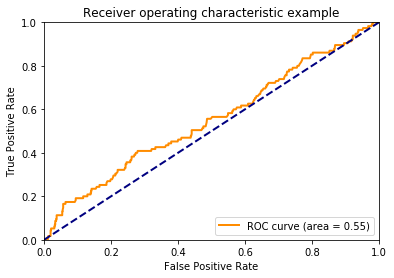

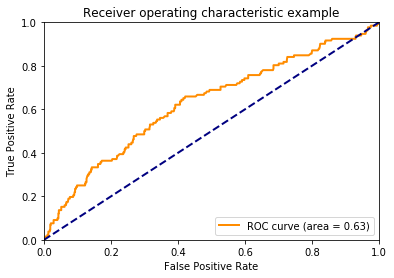

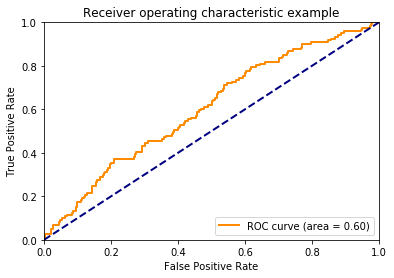

In [183]:
my_model=LogisticRegression()
mbmi=my_logistic_regression(df,my_model,'BMI','TenYearCHD',info=False,roc=True)
m5=my_logistic_regression(df,my_model,df.columns[1:5],'TenYearCHD',info=False,roc=True)
mall=my_logistic_regression(df,my_model,df.columns[0:-1],'TenYearCHD',info=False,roc=True)

In [170]:
final=pd.DataFrame()
final=final.append([mbmi,m5,mall],ignore_index=True)
final

,Features,#Features,test_accurancy,train_accurancy,Train TP,Train TN,Train FP,Train FN,Test TP,Test TN,Test FP,Test FN,AUC
0,BMI,3,0.853717,0.849985,0,2833,0,500,0,2833,0,500,0.583245
1,"Index(['education', 'cigsPerDay', 'BPMeds', 'p...",4,0.858513,0.848785,0,2829,0,504,0,2829,0,504,0.590078
2,"Index(['male', 'education', 'cigsPerDay', 'BPM...",11,0.846523,0.854485,13,2835,7,478,13,2835,7,478,0.619298
